<a href="https://colab.research.google.com/github/manyakhare86/Twitter-Hate-Speech-Detection/blob/main/hate_speech_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Reading dataset

In [2]:
dataset = pd.read_csv('labeled_data.csv')

In [3]:
dataset.head(10)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."
6,6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up ..."
7,7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...
8,8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; ..."
9,9,3,1,2,0,1,""" @rhythmixx_ :hobbies include: fighting Maria..."


In [4]:
dataset.drop(dataset.columns[[0]], axis=1, inplace=True)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   count               24783 non-null  int64 
 1   hate_speech         24783 non-null  int64 
 2   offensive_language  24783 non-null  int64 
 3   neither             24783 non-null  int64 
 4   class               24783 non-null  int64 
 5   tweet               24783 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.1+ MB


In [6]:
dataset.shape

(24783, 6)

In [7]:
dataset.describe()

,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,3.243473,0.280515,2.413711,0.549247,1.110277
std,0.883060,0.631851,1.399459,1.113299,0.462089
min,3.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,0.000000,1.000000
50%,3.000000,0.000000,3.000000,0.000000,1.000000
75%,3.000000,0.000000,3.000000,0.000000,1.000000
max,9.000000,7.000000,9.000000,9.000000,2.000000


In [8]:
dataset.isna().sum()

count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

# Swaping columns

In [9]:
swap_col = ["count","offensive_language","neither","class","tweet","hate_speech"]
dataset = dataset.reindex(columns=swap_col)
dataset['tweet']


0        !!! RT @mayasolovely: As a woman you shouldn't...
1        !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2        !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3        !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4        !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
                               ...                        
24778    you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779    you've gone and broke the wrong heart baby, an...
24780    young buck wanna eat!!.. dat nigguh like I ain...
24781                youu got wild bitches tellin you lies
24782    ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...
Name: tweet, Length: 24783, dtype: object

# Downloading nltk

In [10]:
import nltk
nltk.download('all-nltk')
print("\n")

[nltk_data] Downloading collection 'all-nltk'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    

[nltk_data]    | Downloading package words to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/words.zip.
[nltk_data]    | Downloading package ycoe to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/ycoe.zip.
[nltk_data]    | 
[nltk_data]  Done downloading collection all-nltk


In [11]:
from nltk.tokenize import word_tokenize

sentences = []
for i in dataset['tweet']:
    sentences.append(i)
sentences

["!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...",
 '!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!',
 '!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit',
 '!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny',
 '!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;',
 '!!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;"',
 '!!!!!!"@__BrighterDays: I can not just sit up and HATE on another bitch .. I got too much shit going on!"',
 "!!!!&#8220;@selfiequeenbri: cause I'm tired of you big bitches coming for us skinny girls!!&#8221;",
 '" &amp; you might not get ya bitch back &amp; thats t

# Text preprocessing



In [12]:
dataset['tweet'].head(1)

0    !!! RT @mayasolovely: As a woman you shouldn't...
Name: tweet, dtype: object

In [13]:
# \w = [a-zA-Z0-9_] 
# (?:...) = A non-capturing version of regular parentheses. Matches whatever regular expression is inside the parentheses, but the substring matched 
# by the group cannot be retrieved after performing a match or referenced later in the pattern.

import re

def remove_prior_text(single_tweet):
    remove_user_name = re.sub(r'(@\w+)',"",single_tweet)
    remove_url = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',"",remove_user_name)
    remove_symbols = re.sub(r'([^A-Za-z0-9 ]+)',"",remove_url)
    remove_RT = re.sub(r'RT',"",remove_symbols)
    remove_num = re.sub(r'[0-9]{1,}',"", remove_RT)
    
   
    return remove_num


In [14]:
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

all_sentences_with_preprocessing = []

for sentence in sentences:
    
    regex_filtered_sen = remove_prior_text(sentence)
    without_punc_lst = []
    for word in regex_filtered_sen:
        # removing punctuations
        if word not in string.punctuation:

            # lowering word
            lower_word = word.lower()
            without_punc_lst.append(lower_word)

    # tokenization 
    sen_lst = word_tokenize("".join(without_punc_lst))

    # removing stopwords
    stop_words = set(stopwords.words('english'))
    filtered_sen = [single_word for single_word in sen_lst if single_word not in stop_words]
    
    # lemmatization
    lemmatized_lst = [lemmatizer.lemmatize(word, pos='n') for word in filtered_sen]
    lemmatized_lst
    all_sentences_with_preprocessing.append(' '.join(lemmatized_lst))
len(all_sentences_with_preprocessing)              

24783

In [15]:
all_sentences_with_preprocessing_df = pd.DataFrame(all_sentences_with_preprocessing)

In [16]:
all_sentences_with_preprocessing_df

,0
0,woman shouldnt complain cleaning house amp man...
1,boy dat coldtyga dwn bad cuffin dat hoe st place
2,dawg ever fuck bitch start cry confused shit
3,look like tranny
4,shit hear might true might faker bitch told ya
...,...
24778,yous muthafin lie right tl trash mine bible sc...
24779,youve gone broke wrong heart baby drove rednec...
24780,young buck wan na eat dat nigguh like aint fuc...
24781,youu got wild bitch tellin lie


In [17]:
dataset['tweet'] = all_sentences_with_preprocessing_df

In [18]:
dataset.head(10)

,count,offensive_language,neither,class,tweet,hate_speech
0,3,0,3,2,woman shouldnt complain cleaning house amp man...,0
1,3,3,0,1,boy dat coldtyga dwn bad cuffin dat hoe st place,0
2,3,3,0,1,dawg ever fuck bitch start cry confused shit,0
3,3,2,1,1,look like tranny,0
4,6,6,0,1,shit hear might true might faker bitch told ya,0
5,3,2,0,1,shit blow meclaim faithful somebody still fuck...,1
6,3,3,0,1,sit hate another bitch got much shit going,0
7,3,3,0,1,cause im tired big bitch coming u skinny girl,0
8,3,3,0,1,amp might get ya bitch back amp thats,0
9,3,2,0,1,hobby include fighting mariambitch,1


In [19]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [20]:
X

array([[3, 0, 3, 2,
        'woman shouldnt complain cleaning house amp man always take trash'],
       [3, 3, 0, 1, 'boy dat coldtyga dwn bad cuffin dat hoe st place'],
       [3, 3, 0, 1, 'dawg ever fuck bitch start cry confused shit'],
       ...,
       [3, 3, 0, 1,
        'young buck wan na eat dat nigguh like aint fuckin dis'],
       [6, 6, 0, 1, 'youu got wild bitch tellin lie'],
       [3, 0, 3, 2,
        'ruffled ntac eileen dahlia beautiful color combination pink orange yellow amp white coll']],
      dtype=object)

In [21]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [22]:
words_set = set()

In [23]:
for sentence in X[:,-1]:
    words_set = words_set.union(set(sentence.split()))
len(words_set)                   

20204

In [24]:
words_set

{'kissin',
 'althea',
 'surfing',
 'ganks',
 'hallon',
 'positive',
 'teirra',
 'nothing',
 'swatted',
 'metlife',
 'wthe',
 'scholar',
 'gaddafi',
 'kawasaki',
 'ambulance',
 'nfl',
 'swamp',
 'cancergt',
 'recent',
 'fuckherrightinthepussy',
 'hoeshe',
 'bronyfolk',
 'wtmf',
 'kissing',
 'circumstance',
 'romanowski',
 'rbi',
 'boozer',
 'capuano',
 'chuckie',
 'none',
 'jm',
 'stub',
 'sevenone',
 'karmic',
 'contagious',
 'icecream',
 'wcws',
 'open',
 'mattress',
 'ventilation',
 'edmondson',
 'jfk',
 'old',
 'encountered',
 'gstar',
 'allegation',
 'shmediumproblems',
 'allegedly',
 'relationshipgoals',
 'phat',
 'lolthey',
 'wetback',
 'tittied',
 'squander',
 'messi',
 'gas',
 'rasta',
 'pussyits',
 'pussymattietrumpstipsforabetterlifeeat',
 'temporarily',
 'tweet',
 'emergency',
 'interiorlight',
 'pointed',
 'jersey',
 'skitdaddle',
 'rutba',
 'pagethank',
 'protocol',
 'importantur',
 'helm',
 'fiasco',
 'naw',
 'bleu',
 'honkytonk',
 'probs',
 'casino',
 'luvv',
 'triflin',

In [25]:
len_lst = []
for sentence in X[:,-1]:
    len_lst.append(len(sentence.split()))
max(len_lst) 

25

In [26]:
dataset

,count,offensive_language,neither,class,tweet,hate_speech
0,3,0,3,2,woman shouldnt complain cleaning house amp man...,0
1,3,3,0,1,boy dat coldtyga dwn bad cuffin dat hoe st place,0
2,3,3,0,1,dawg ever fuck bitch start cry confused shit,0
3,3,2,1,1,look like tranny,0
4,6,6,0,1,shit hear might true might faker bitch told ya,0
...,...,...,...,...,...,...
24778,3,2,1,1,yous muthafin lie right tl trash mine bible sc...,0
24779,3,1,2,2,youve gone broke wrong heart baby drove rednec...,0
24780,3,3,0,1,young buck wan na eat dat nigguh like aint fuc...,0
24781,6,6,0,1,youu got wild bitch tellin lie,0


# EDA

In [27]:
dataset.columns

Index(['count', 'offensive_language', 'neither', 'class', 'tweet',
       'hate_speech'],
      dtype='object')

In [28]:
import matplotlib.pyplot as plt

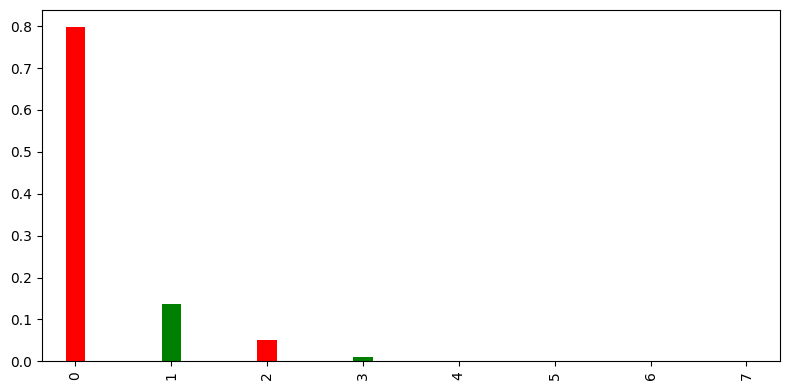

In [29]:
fig, axes = plt.subplots(figsize=(8,4))
dataset['hate_speech'].value_counts(normalize=True).plot.bar(width=0.2, color=('red', 'green'))

plt.tight_layout()
plt.show()

<ipython-input-30-0144baec0948>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cols[column])
<ipython-input-30-0144baec0948>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cols[column])
<ipython-input-30-0144baec0948>:9: UserWarning: 

`distplot` is a deprecated function and will be removed 

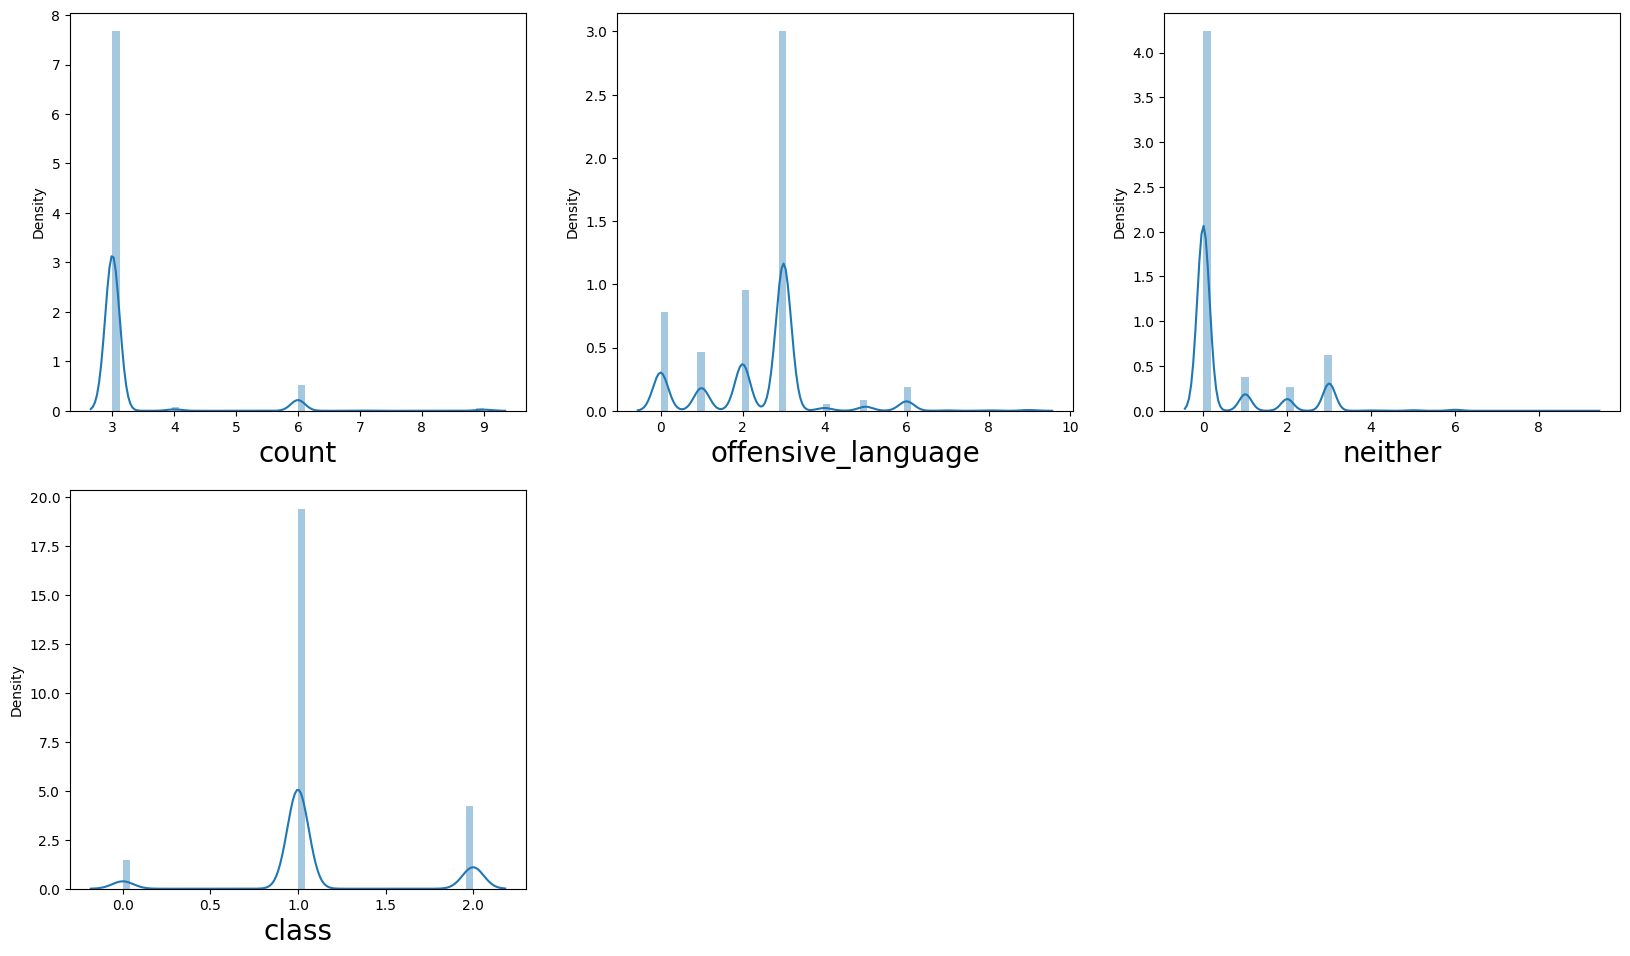

In [30]:
cols = dataset[['count', 'offensive_language', 'neither', 'class']]
import seaborn as sns
plt.figure(figsize=(20, 30), facecolor='white')
plotnumber = 1

for column in cols:
    if plotnumber <= len(cols):
        ax = plt.subplot(5, 3, plotnumber)
        sns.distplot(cols[column])
        plt.xlabel(column, fontsize=20)
    plotnumber += 1
plt.show()

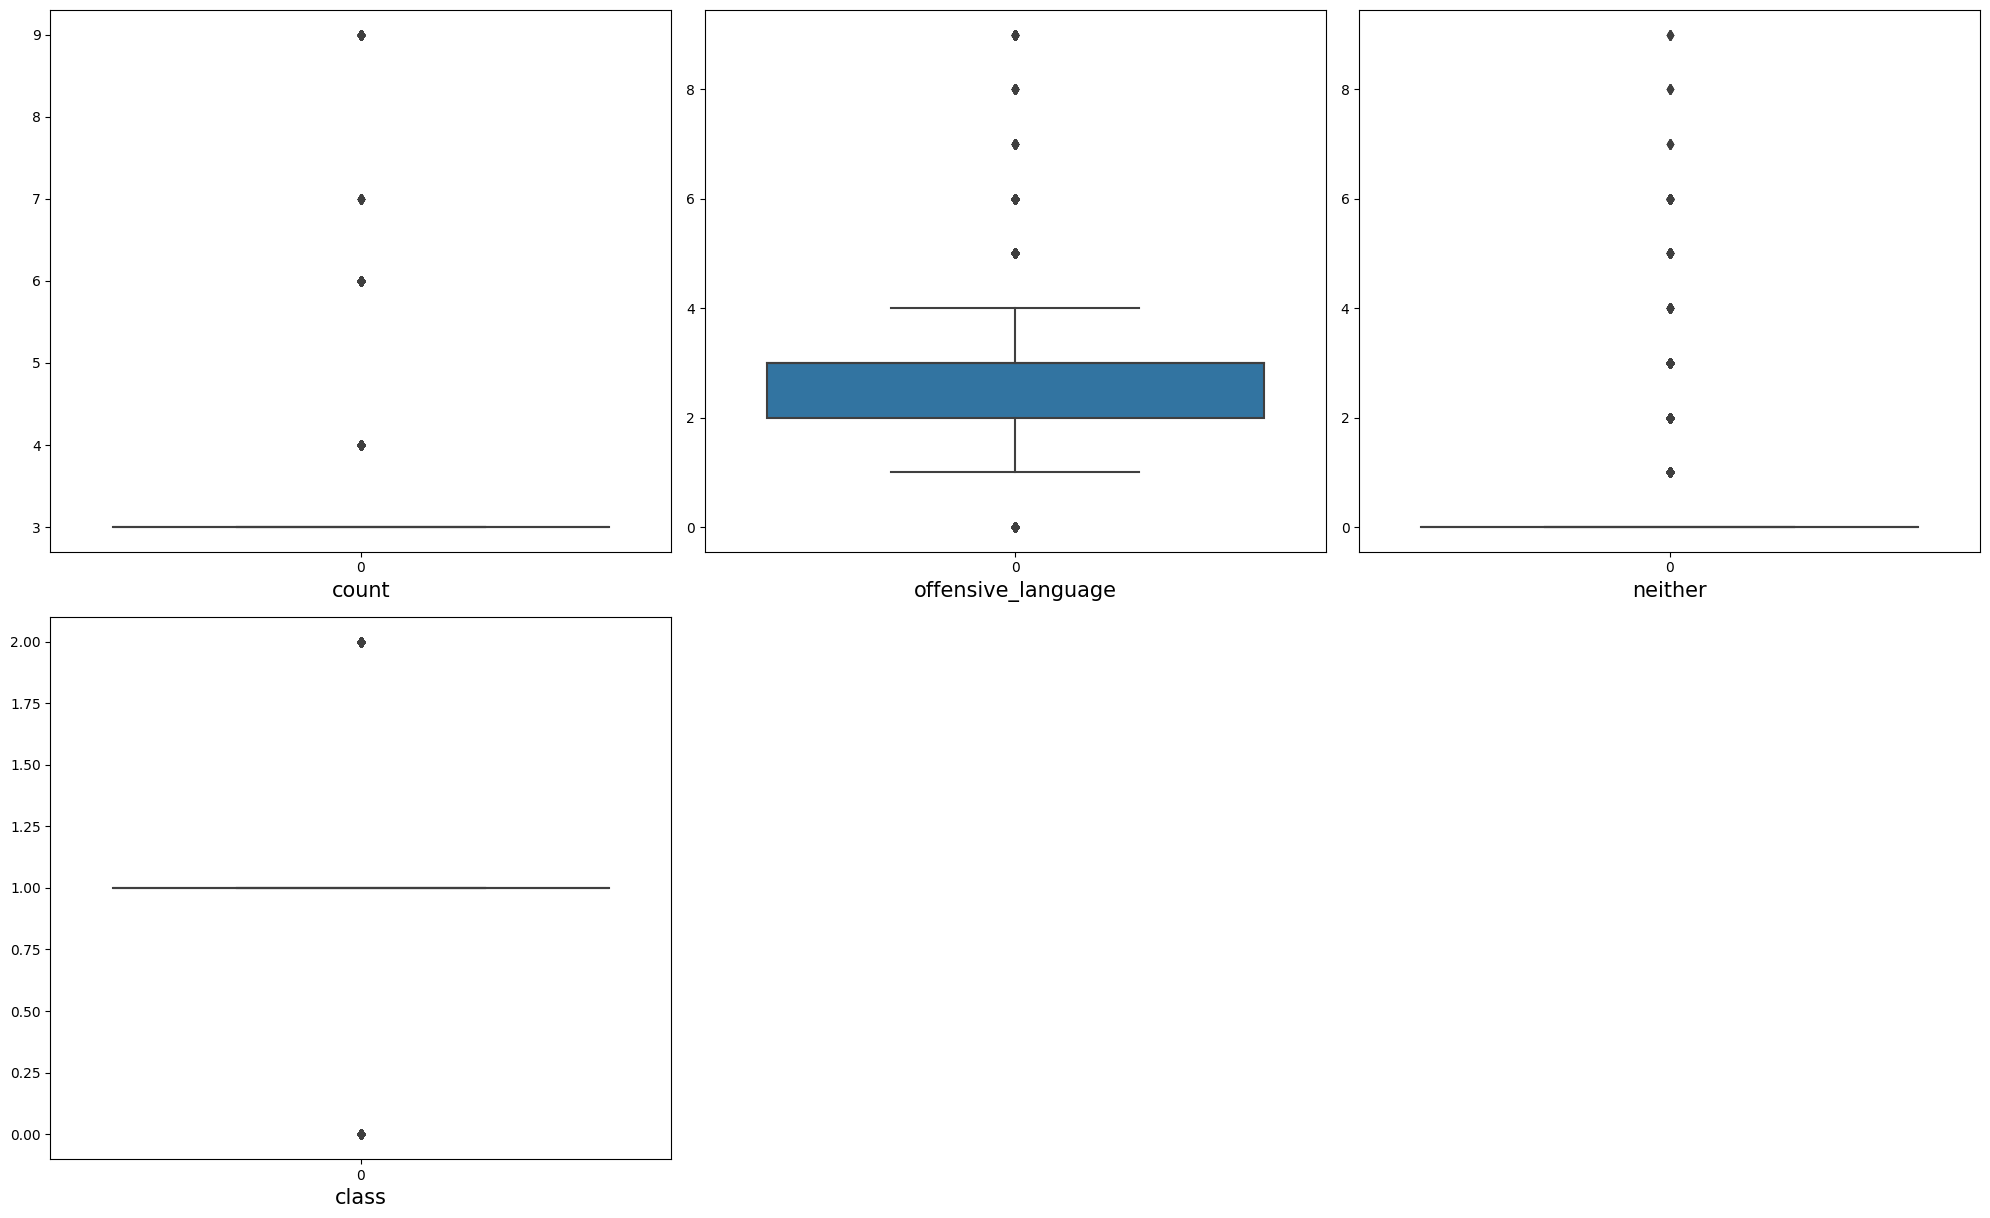

In [31]:
# boxplot
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in cols:
    if plotnumber <= len(cols):
        ax = plt.subplot(5, 3, plotnumber)
        sns.boxplot(cols[column])
        plt.xlabel(column, fontsize=15)
    plotnumber += 1
plt.tight_layout()    

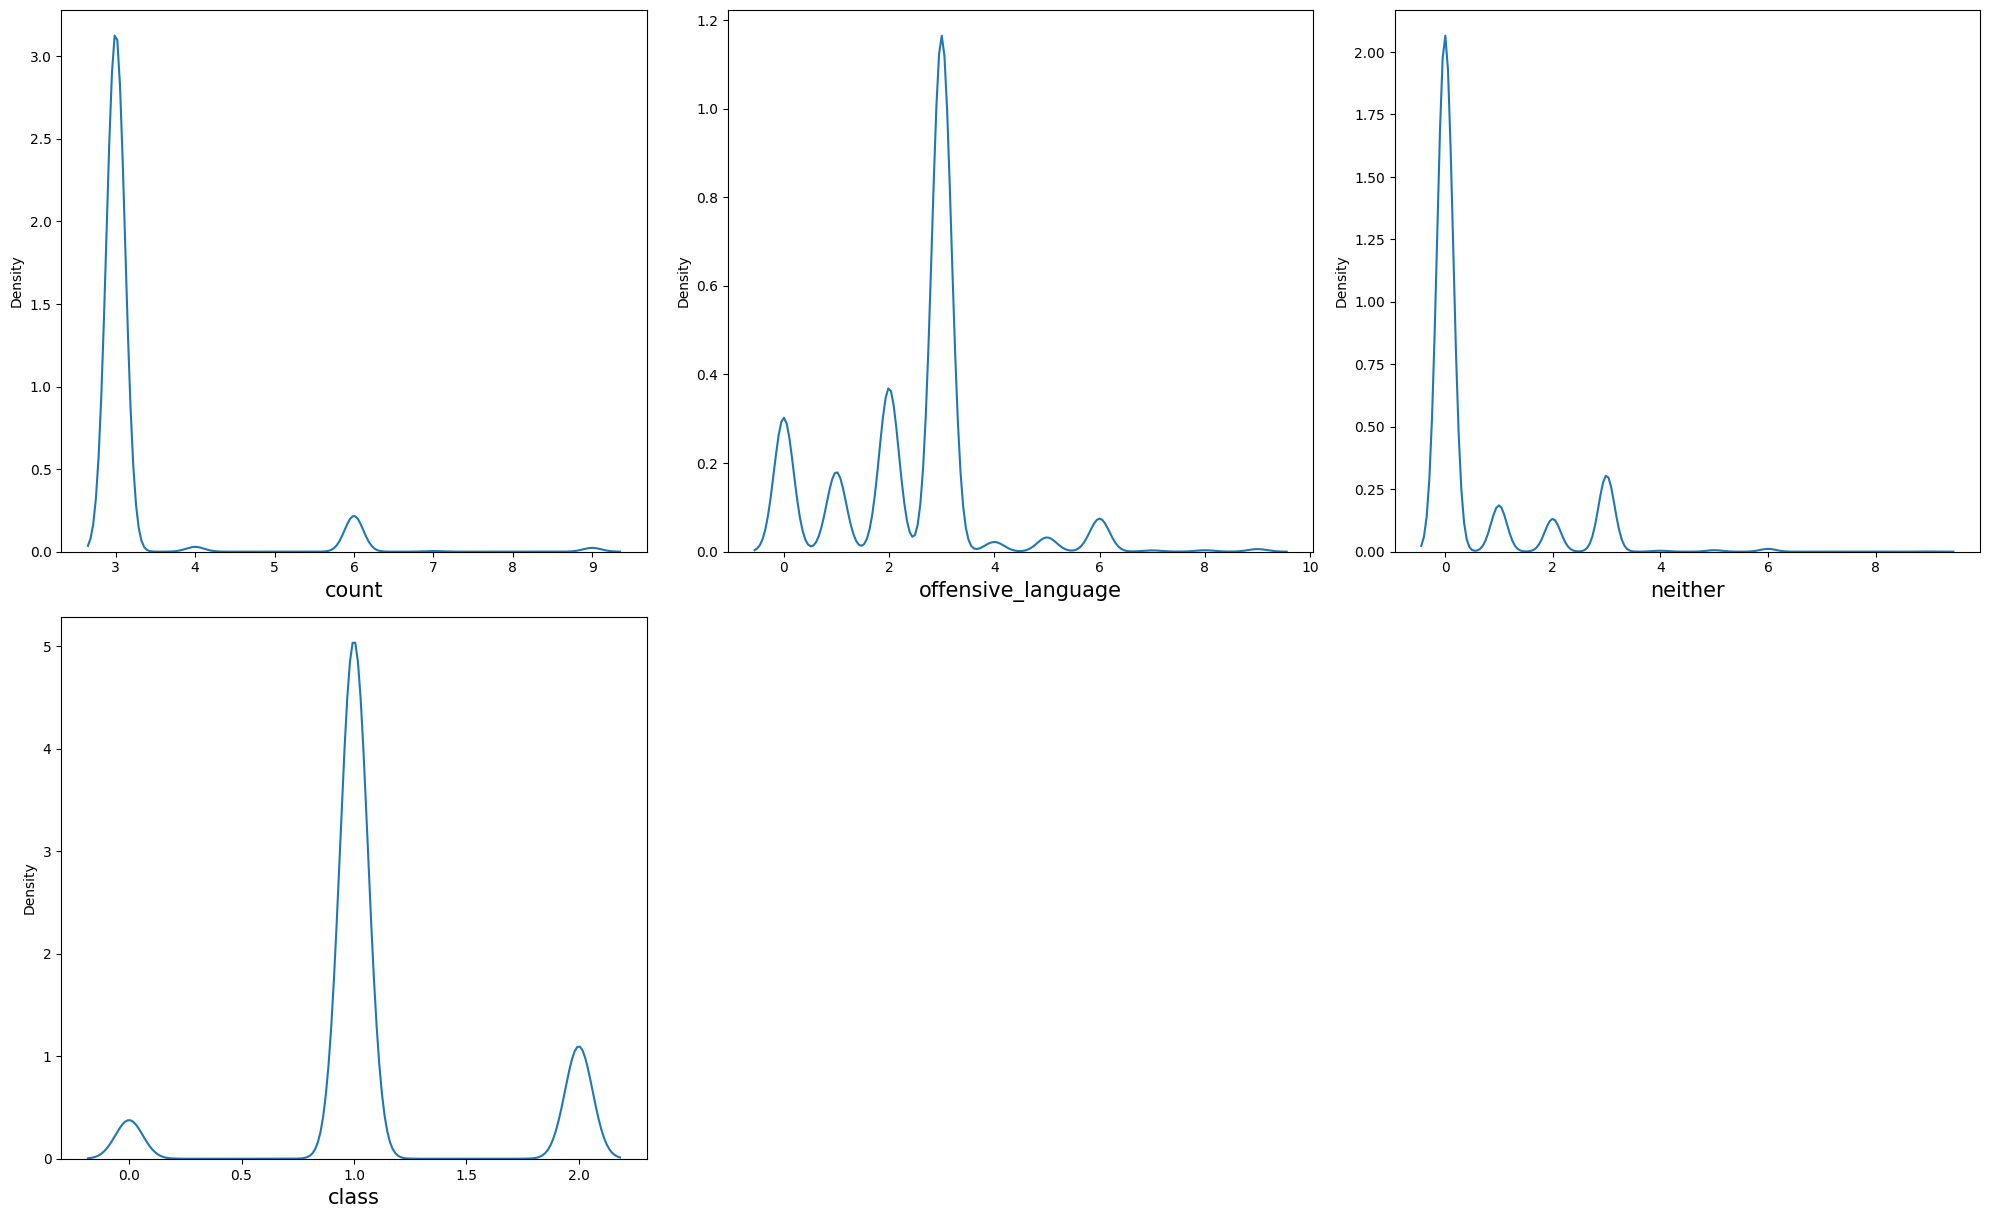

In [32]:
# kdeplot
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in cols:
    if plotnumber <= len(cols):
        ax = plt.subplot(5, 3, plotnumber)
        sns.kdeplot(cols[column])
        plt.xlabel(column, fontsize=15)

    plotnumber += 1
plt.tight_layout()        

# BERT

In [33]:
!pip3 install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 56.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 76.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.4/265.4 kB 18.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 87.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 39.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Prepari

## Importing libraries

In [34]:
import os.path
import numpy as np
import tensorflow as tf
import ktrain
from ktrain import text

In [35]:
train_data = dataset.sample(frac=0.75)

In [36]:
train_data

,count,offensive_language,neither,class,tweet,hate_speech
21073,6,6,0,1,someone tell drink bitch fucking first night m...,0
2172,3,3,0,1,nobody sell orange flavored colored bubblegum ...,0
9971,3,3,0,1,actually get erin think shes really nice bit y...,0
22615,6,6,0,1,bitch ive got youre girlfriend,0
13290,4,3,0,1,nigga ill take ya main hoe make call home girl...,1
...,...,...,...,...,...,...
6540,3,3,0,1,atleast wipe as trashy bitch,0
19446,3,0,3,2,ive also seen lot democrat charlie baker ad ma...,0
22906,3,3,0,1,jorge zimmerman arrested prosecutor witness sa...,0
407,3,3,0,1,chase money hoe,0


In [37]:
test_data = dataset.drop(train_data.index)

In [38]:
test_data

,count,offensive_language,neither,class,tweet,hate_speech
1,3,3,0,1,boy dat coldtyga dwn bad cuffin dat hoe st place,0
6,3,3,0,1,sit hate another bitch got much shit going,0
10,3,3,0,1,keeks bitch curve everyone lol walked conversa...,0
11,3,3,0,1,murda gang bitch gang land,0
12,3,2,1,1,hoe smoke loser yea go ig,0
...,...,...,...,...,...,...
24760,3,2,1,1,drove redneck crazy,0
24772,3,3,0,1,might well gone pussy pop stage,0
24774,3,3,0,1,really care bout dis bitch dick yo feeling,0
24775,3,3,0,1,worried bout bitch need,0


## Creating training and test sets

In [39]:
(X_train, y_train), (X_test, y_test), prepoc = text.texts_from_df(train_df=train_data,
                   text_column='tweet',
                   label_columns='hate_speech',
                   val_df = test_data,
                   maxlen=500, 
                   preprocess_mode='bert')

['hate_speech_0', 'hate_speech_1', 'hate_speech_2', 'hate_speech_3', 'hate_speech_4', 'hate_speech_5', 'hate_speech_6', 'hate_speech_7']
       hate_speech_0  hate_speech_1  hate_speech_2  hate_speech_3  \
21073            1.0            0.0            0.0            0.0   
2172             1.0            0.0            0.0            0.0   
9971             1.0            0.0            0.0            0.0   
22615            1.0            0.0            0.0            0.0   
13290            0.0            1.0            0.0            0.0   

       hate_speech_4  hate_speech_5  hate_speech_6  hate_speech_7  
21073            0.0            0.0            0.0            0.0  
2172             0.0            0.0            0.0            0.0  
9971             0.0            0.0            0.0            0.0  
22615            0.0            0.0            0.0            0.0  
13290            0.0            0.0            0.0            0.0  
['hate_speech_0', 'hate_speech_1', 'hate

Is Multi-Label? False
preprocessing test...
language: en


In [40]:
len(X_train)


2

In [41]:
X_train[0].shape

(18587, 500)

In [42]:
np.max(np.max(X_train[0], axis = 1))

29602

## Building the Bert Model

In [43]:
model = text.text_classifier(name='bert',
                             train_data=(X_train, y_train),
                             preproc=prepoc)

Is Multi-Label? False
maxlen is 500


/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


done.


## Training the bert model

In [44]:
learner = ktrain.get_learner(model=model, 
                             train_data=(X_train,y_train),
                             val_data=(X_test, y_test),
                             batch_size=6)

In [45]:
learner.fit_onecycle(lr=2e-5, epochs=8)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/8
3098/3098 [==============================] - 2785s 890ms/step - loss: 0.6365 - accuracy: 0.7956 - val_loss: 0.5426 - val_accuracy: 0.8097
Epoch 2/8
3098/3098 [==============================] - 2756s 889ms/step - loss: 0.5417 - accuracy: 0.8039 - val_loss: 0.5260 - val_accuracy: 0.8092
Epoch 3/8
3098/3098 [==============================] - 2707s 874ms/step - loss: 0.5061 - accuracy: 0.8086 - val_loss: 0.5222 - val_accuracy: 0.8129
Epoch 4/8
3098/3098 [==============================] - 2758s 890ms/step - loss: 0.4475 - accuracy: 0.8246 - val_loss: 0.5546 - val_accuracy: 0.7978
Epoch 5/8
3098/3098 [==============================] - 2756s 890ms/step - loss: 0.3346 - accuracy: 0.8714 - val_loss: 0.7200 - val_accuracy: 0.7702
Epoch 6/8
3098/3098 [==============================] - 2758s 890ms/step - loss: 0.1957 - accuracy: 0.9265 - val_loss: 0.8705 - val_accuracy: 0.7650
Epoch 7/8
3098/3098 [============================

In [46]:
predictor = ktrain.get_predictor(learner.model, prepoc)

# **Accuracy achieved from BERT is 98% on 8th epoch**